# Introductie thermo simulaties (1h)

In Q2 werken we aan een deeltjes model.
Dat model bestaat uiteindelijk uit een stuk of 100 deeltjes die in een afgesloten volume bewegen.
Om voor elk deeltje apart de eigenschappen te bepalen, wordt enorm veel code.
Omdat de deeltjes dezelfde eigenschappen hebben (massa, radius, snelheid, positie) kunnen we gebruik maken van classes.

Een *class* is een blauwdruk voor het creëren van objecten (zoals deeltjes, atomen, planeten, auto's, studenten... noem maar op!).
Het stelt je in staat om data (zoals positie, massa) en gedrag (zoals bewegen, botsen) te bundelen tot één overzichtelijk geheel.
Precies wat we nodig hebben.
Laten we de anatomie van een deeltje creëren.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Definieer een class voor een deeltje. 
# Een class beschrijft alleen het type eigenschappen dat een ding heeft, bijvoorbeeld: in de beschrijving van de class zeg je:
# - een deeltje heeft een positie.
# - een deeltje heeft een functie die, wanneer aangeroepen, de positie van dat deeltje bijwerkt.
# Merk op dat de class zelf geen deeltje is! 
# Een object dat tot een bepaalde class behoort, wordt een instant van die class genoemd. 
# Je kunt meerdere instants van een class hebben.

class ParticleClass:
    def __init__(self, m, v, r, R):
        self.m = m                         # massa van het deeltje
        self.v = np.array(v, dtype=float)  # snelheids vector
        self.r = np.array(r, dtype=float)  # positie vector
        self.R = np.array(R, dtype=float)  # radius van het deeltje

    def update_position(self,dt):
        """Werk de positie van het deeltje bij op basis van zijn snelheid en tijdstap dt."""
        self.r += self.v * dt

print(ParticleClass)

<class '__main__.ParticleClass'>


We hebben alleen de class aangemaakt, maar nog niet een object zelf.
We hebben ook de mogelijkheid gemaakt om een nieuwe positie uit te rekenen: de volgende positie is de huidige positie + de snelheid maal de tijdstap, ofwel: 

$$ x_{n+1}=x_n + v\cdot\Delta t $$

Laten we nu een ook echt een deeltje creëren en kijken wat we ermee kunnen doen.

In [3]:
# een enkel deeltje:
this_particle = ParticleClass(m=1.0, v=[5.0, 0], r=[0.0, 0.0], R=1.0)
print(this_particle)
%whos

Variable        Type             Data/Info
------------------------------------------
ParticleClass   type             <class '__main__.ParticleClass'>
np              module           <module 'numpy' from 'c:\<...>ges\\numpy\\__init__.py'>
plt             module           <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
this_particle   ParticleClass    <__main__.ParticleClass o<...>ct at 0x000001FFDD63EFC0>


Nu we een object hebben, laten we eens kijken of we de eigenschappen van het object kunnen opvragen:

In [4]:
print("Massa van het deeltje " + str(this_particle.m) + " kg")
print("Huidige positie is " + str(this_particle.r))

# oproepen van de functie 'update_position' met dt = 1.0 seconde
this_particle.update_position(1.0)
print("Nieuwe positie " + str(this_particle.r))

Massa van het deeltje 1.0 kg
Huidige positie is [0. 0.]
Nieuwe positie [5. 0.]


Let op! Run je bovenstaande cell opnieuw, dan zal de positie ook steeds veranderen!

Laten we nog een deeltje maken om te laten zien dat het aanroepen van update op het ene deeltje geen invloed heeft op het andere deeltje: het zijn onafhankelijke objecten!

In [5]:
that_particle = ParticleClass(m=1.0, v=[2.0, 0], r=[5.0, 0.0],R=1.0)

In [6]:
print("Huidige positie van this_particle " + str(this_particle.r))
print("Huidige position van that_particle " + str(that_particle.r))

# oproepen van de functie 'update_position' met dt = 2.0 seconde
that_particle.update_position(2.0)
print("Nieuwe positie van this_particle " + str(this_particle.r))
print("Nieuwe positie van that_particle " + str(that_particle.r))

Huidige positie van this_particle [5. 0.]
Huidige position van that_particle [5. 0.]
Nieuwe positie van this_particle [5. 0.]
Nieuwe positie van that_particle [9. 0.]


We kunnen ook een array van objecten maken.
Dat zou eenvoudig moeten kunnen als het gaat om dezelfde deeltjes (zelfde massa, snelheid, maar andere startpositie). 

In [7]:
particle_array = []

for start_x in range(4):
    particle_array.append(ParticleClass(m=1.0, v=[2.0, 0], r=[start_x, 0.0],R=1.0))

In [8]:
print("Hoe het array eruit ziet volgens python: " + str(particle_array))
print("Hoe een element van het array eruit ziet volgens python: " + str(particle_array[0]))
print("Hoe een eigenschap (in dit geval: 'r') van het element van het array eruit ziet volgens python: " + str(particle_array[0].r))

Hoe het array eruit ziet volgens python: [<__main__.ParticleClass object at 0x000001FFDD63EED0>, <__main__.ParticleClass object at 0x000001FFDE7E4440>, <__main__.ParticleClass object at 0x000001FFDE6FE240>, <__main__.ParticleClass object at 0x000001FFDE8FDEE0>]
Hoe een element van het array eruit ziet volgens python: <__main__.ParticleClass object at 0x000001FFDD63EED0>
Hoe een eigenschap (in dit geval: 'r') van het element van het array eruit ziet volgens python: [0. 0.]


```{exercise} Voorspel
:label: ex-intro-1

Hoe ziet de positie er dan uit van die deeltjes?
Voorspel en controleer vervolgens met onderstaande code.
```

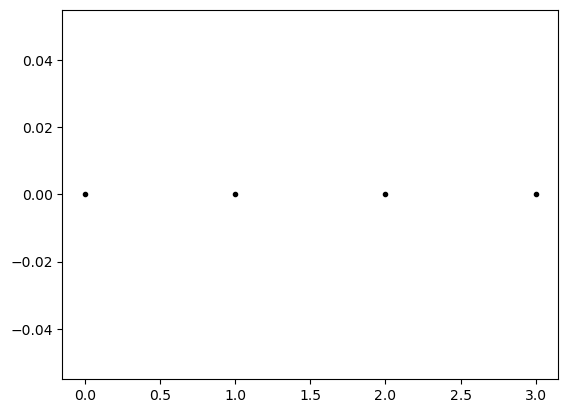

In [9]:
plt.figure()
for particle in particle_array:
    plt.plot(particle.r[0],particle.r[1],'k.')
plt.show()


Wat eerder op moet zijn gevallen, en wat hierboven ook weer duidelijk wordt is dat de positie een 2D vector is.
We kunnen dus onafhankelijk in de x en y richting bewegen!

Door gebruik te maken van een array waarin alle deeltjes zijn opgeslagen, kun je voor elk deeltje dezelfde bewerking uitvoeren, bijvoorbeeld allemaal een stukje updaten in de tijd!
Hierbij kan je mooi gebruik maken van hoe Python loops maakt: als je één voor één de verschillende elementen van array af wilt gaan en daar dezelfde bewerking op doen, gaat dat zo:

In [10]:
for particle, particle_object in enumerate(particle_array):
    print("Deeltje " + str(particle) + ", huidige positie: " + str(particle_object.r))
    print("oproepen van de functie 'update_position' met dt = 1.0 second ")
    particle_object.update_position(1.0)
    print("Volgende positie " + str(particle_object.r))
    if particle < len(particle_array) - 1:
        print("Naar het volgende deeltje \n")
    

Deeltje 0, huidige positie: [0. 0.]
oproepen van de functie 'update_position' met dt = 1.0 second 
Volgende positie [2. 0.]
Naar het volgende deeltje 

Deeltje 1, huidige positie: [1. 0.]
oproepen van de functie 'update_position' met dt = 1.0 second 
Volgende positie [3. 0.]
Naar het volgende deeltje 

Deeltje 2, huidige positie: [2. 0.]
oproepen van de functie 'update_position' met dt = 1.0 second 
Volgende positie [4. 0.]
Naar het volgende deeltje 

Deeltje 3, huidige positie: [3. 0.]
oproepen van de functie 'update_position' met dt = 1.0 second 
Volgende positie [5. 0.]


Let op! In bovenstaande code maken we handig gebruik van twee programmeerconcepten.
`enumerate` hangt een nummer (counter) aan elk item in de array. Zo kun je bijhouden met welk deeltje je bezig bent. 

Omdat onze code steeds aan het eind aangeeft dat het naar het volgende deeltje gaat, moet die code alleen stoppen bij het laatste deeltje.
We hebben hier gebruik gemaakt van het `if` statement.
Deze manier van werken is misschien niet heel efficient - het kost rekentijd - maar kan enorm helpen bij debuggen van code: je ziet snel welke tekst wel en welke tekst niet geprint wordt.


```{exercise}
:label: intro-ex-2
Maak 10 deeltjes, elk startend op positie (0,0) maar met een random snelheid tussen de -5 en +5.
Update de positie en plot de positie van elk deeltje. 

En als je wilt gaan voor een uitdaging: 
- plot in dezelfde figuur de begin en eindpositie van elk deeltje
- maak gebruik van een kleine verticale snelheid om het verschil te kunnen zien.
- hoe zou je elk deeltje een andere kleur kunnen geven in de plot zodat ze ook echt traceerbaar zijn?
```

<function matplotlib.pyplot.show(close=None, block=None)>

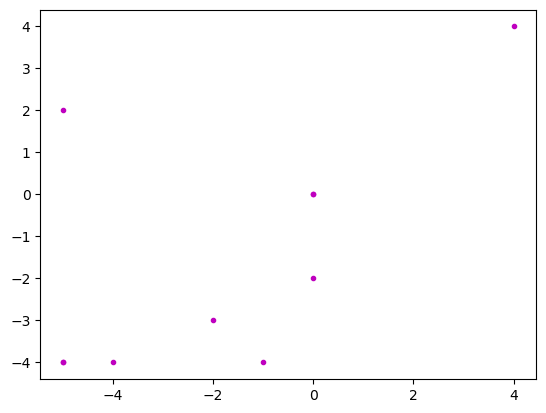

In [ ]:
#your code/answer
class deeltjeclass:
    def __init__ (self,x):
        self.x= np.array(x, dtype=float)
        self.v= np.array([np.random.randint(-5,5), np.random.randint(-5,5)], dtype=float)

    def beweging(self,dt):
        self.x= self.x + self.v * dt
deeltjes= deeltjeclass(x=[0,0])
deeltjes_array=[deeltjeclass([0,1]) for i in range(10)]
colors = ['r','b','g','c','m','y','k']
plt.figure()
for index, deeltje in enumerate( deeltjes_array):
    deeltje.beweging(1.0)
    plt.plot(deeltje.x[0],deeltje.x[1], f'{colors[index % len(colors)]}.')
   
plt.show




Onze simulaties worden snel "zwaar". 
Er moeten veel berekeningen gedaan worden en dat kost nu eenmaal tijd.
Nu is het wel zo dat sommige berekeningen meer tijd kosten dan anderen.
Om te kijken of een stukje code geoptimaliseerd kan worden, moeten we een timer maken.
Dat kan met onderstaande code:

In [17]:
import time
import numpy as np

start = time.time()

array = np.array([])
N = int(1e5)
array= np.append(array,np.random.rand(N))


eind = time.time()
lengte = eind - start

print("Dit kostte ", lengte, "seconde!")

Dit kostte  0.0 seconde!


Idealiter draaien we de bovenstaande code een aantal keer zodat we een goede schatting hebben van de rekentijd.

```{exercise} Timen
:label: ex-intro-3

Bovenstaande code kan natuurlijk veel sneller, in de functie random.rand() kun je het aantal elementen (N) mee geven. D
Voeg in bovenstaande code-cell de alternatieve methode voor het maken van de array toe en bereken de runtime.
Hoeveel keer korter is de runtime?

Gedaan? Push je werk naar GitHub, check de GH page en laat je werk controleren en aftekenen door een TA en ga door met het volgende hoofdstuk.
```

```{tip}
Met de MyST extentie in jupyterlab kun je gebruik maken van [eval](https://mystmd.org/guide/notebooks-with-markdown#myst-inline-expressions). Hieronder kun je de naam van je variabele invoeren die je hierboven heb gespecificeerd om uit te drukken hoeveel korter de runtime is.
```

```{solution} ex-intro-3
De runtime is {eval}`<naam variabele>` korter.
```